# Markov Decision Processes
- RL boils down to agent interacting w/ env, and receives a reward
- We get a sequence of states, actions, and rewards
- MDP: State depends only on previous state and action
    - not MDP: things that depend on the entire history
    - this is an idealized mathematical abstraction, almost never completely true

- We do not have deterministic outputs for the next state, instead we use probability distributions.
$$
p(s', r | a, s) \ne 1 \\
\sum_{s', r}p(s', r | a, s) = 1 \\
$$
- Probabilities define our dynamics
- The expected value of the reward given we are at some state s and take some action a is:
$$
r(s, a) = E[R_t,|S_{t-1} = s, A_{t-1} = a] = \sum_{r\in R}r\sum_{s' \in S}p(s', r |s, a)
$$
- This is the sum of the all possible rewards scaled by the probabilities of transitioning into a state which offers that reward from the last s and a

- Expected reward $\rightarrow$ outcome $\times$ probability

- the agent wants to maximize its future rewards
- so it will aim to estimate the sum of rewards following current time until a terminal time $T$
$$G=R_{t+1}+R_{t+2}+\dots+R_{T}$$
- Episodes: discrete periods of game play characterized by series of state changes, actions, rewards
- Terminal state is unique and expected return of this state is 0
$$G_T = 0$$
- Not all tasks are episodic: 
$$
\sum_{t=0}^{T=\infty}R_t\rightarrow \infty
$$
- In these cases we must discount future rewards in order to calculate the expected return
- $\gamma$ is a hyper parameter which is essentially represents how far into the future our agent will look to maximize its future rewards
$$
\sum_{t=0}^{\infty}\gamma^kR_t \rightarrow C, \text{ where } 0\le\gamma\le1
$$
- These summations can be computationally inefficient, however, we can cut down on computation by realizing that the calculations are recursive:
$$
G_t=\gamma^0R_{t+1}+\gamma^1R_{t+2}+\gamma^2R_{t+3}+\dots \\
G_t=R_{t+1}+\gamma(\gamma^0R_{t+2}+\gamma^1R_{t+3}+\dots) \\
G_t=R_{t+1}+\gamma(G_{t+1})
$$

- The policy is a mapping from states to actions
    - denoted by $\Pi$
    - it is generally probabilistic

In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt

In [4]:
env = gym.make("FrozenLake-v1", render_mode="ansi")
n_games = 1000
win_pct = []
scores = []

In [16]:
print(env.reset())
print(env.render())

(0, {'prob': 1})

SFFF
FHFH
FFFH
HFFG



In [17]:
env.step(2)

(1, 0.0, False, False, {'prob': 0.3333333333333333})

In [18]:
policy = {0: 1, 1: 2, 2: 1, 3: 0, 4: 1, 6: 1, 8: 2, 9: 1, 10: 1, 13: 2, 14: 2}

In [19]:
for i in range(n_games):
    terminated = False
    obs, prob = env.reset()
    score = 0
    
    while not terminated:
        action = policy[obs]
        obs, reward, terminated, trunc, info = env.step(action)
        score += reward
    scores.append(score)

    if i and i % 10 == 0:
        avg = np.mean(scores[:-10])
        win_pct.append(avg)

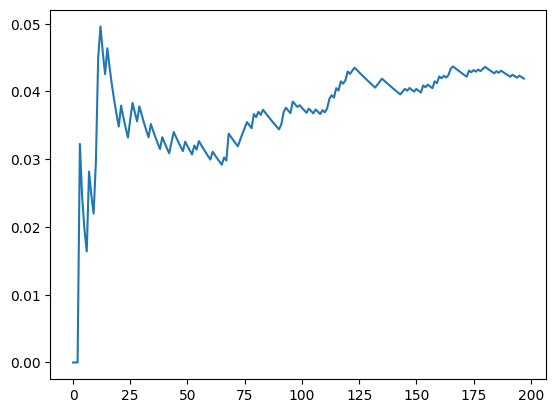

In [20]:
plt.plot(win_pct)

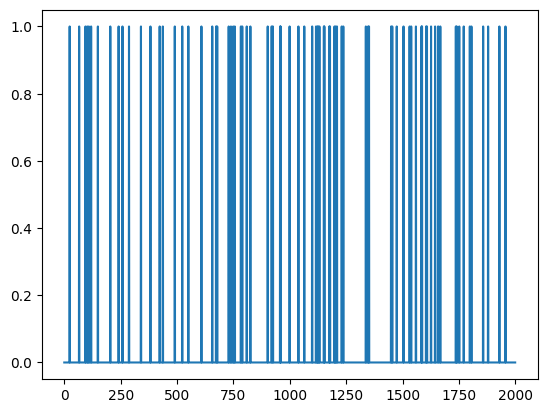

In [21]:
plt.plot(scores)

- MDPs determined by previous states and actions
- Governed by probability distribution
- Agent maximizes rewards over time
- Policy tells us how actions are made at each state